In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.graphics.tsaplots as tsa_plots

In [3]:
df = pd.read_excel('CocaCola_Sales_Rawdata.xlsx',index_col='Quarter',parse_dates=True)
df

,Sales
Quarter,
Q1_86,1734.827000
Q2_86,2244.960999
Q3_86,2533.804993
Q4_86,2154.962997
Q1_87,1547.818996
Q2_87,2104.411995
Q3_87,2014.362999
Q4_87,1991.746998
Q1_88,1869.049999


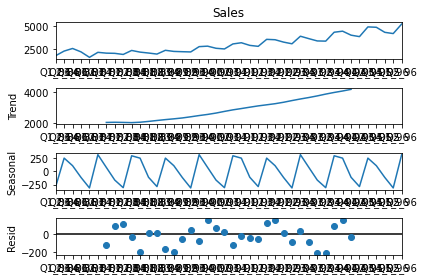

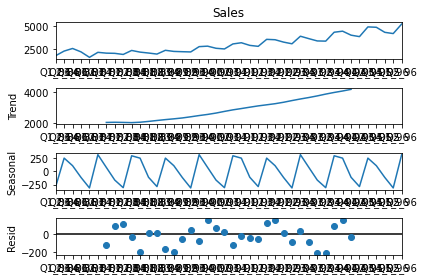

In [4]:
decompose_ts = seasonal_decompose(df['Sales'],period=12)
decompose_ts.plot()

In [5]:
from statsmodels.tsa.stattools import adfuller
def adf_test(series):    
    result = adfuller(series.dropna())  
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)
    #for key,val in result[4].items():
        #out[f'critical value ({key})']=val
    if result[1] <= 0.05:
        print("Reject the null hypothesis")
        print("Data is stationary")
    else:
        print("Fail to reject the null hypothesis")
        print("Data is non-stationary")

In [6]:
adf_test(df['Sales'])

Fail to reject the null hypothesis
Data is non-stationary


In [7]:
from statsmodels.tsa.statespace.tools import diff
df['d1'] = diff(df['Sales'],k_diff=1)
adf_test(df['d1'])

Fail to reject the null hypothesis
Data is non-stationary


In [8]:
from statsmodels.tsa.statespace.tools import diff
df['d2'] = diff(df['Sales'],k_diff=2)
adf_test(df['d2'])

Reject the null hypothesis
Data is stationary


In [9]:
!pip install --user pmdarima

In [10]:
from pmdarima import auto_arima

In [11]:
stepwise_fit = auto_arima(df['Sales'], start_p=0, start_d=0, start_q=0,
                          max_p=10, max_d=3, max_q=10, m=12,
                          seasonal=False,
                          d=None, trace=True,
                          error_action='ignore',   
                          suppress_warnings=True, 
                          stepwise=True) 

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=617.615, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=619.036, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=607.723, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=617.215, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=608.949, Time=0.15 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=606.079, Time=0.13 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=607.920, Time=0.18 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=596.966, Time=0.29 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=578.551, Time=0.33 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=579.745, Time=0.27 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=557.178, Time=0.35 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=559.112, Time=0.27 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=563.196, Time=0.38 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=inf, Time

In [12]:
len(df)

42

In [13]:
train = df.iloc[:35]
test = df.iloc[35:]

In [14]:
from statsmodels.tsa.arima_model import ARIMA

In [15]:
model = ARIMA(train['Sales'],order=(4,1,1))
results = model.fit()
results.summary()

C:\Users\Mayu\Downloads\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Mayu\Downloads\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                   34
Model:                 ARIMA(4, 1, 1)   Log Likelihood                -226.075
Method:                       css-mle   S.D. of innovations            172.027
Date:                Wed, 06 Oct 2021   AIC                            466.150
Time:                        13:48:31   BIC                            476.834
Sample:                             1   HQIC                           469.793
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            61.3875     30.299      2.026      0.043       2.002     120.773
ar.L1.D.Sales    -0.2922      0.214     -1.366      0.172      -0.711       0.127
ar.L2.D.Sales    -0.2950      0.187     -1.579      0.114      -0.661       0.071
ar.L3.D.Sales    -0.2319      0.209     -1.111      0.266      -0.641       0.177
ar.L4.D.Sales     0.6561      0.191      3.429      0.001       0.281       1.031
ma.L1.D.Sales     0.2210      0.275      0.804      0.421      -0.318       0.760
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.0361           -0.0000j            1.0361           -0.5000
AR.2           -0.0158           -1.0173j            1.0174           -0.2525
AR.3           -0.0158           +1.0173j            1.0174            0.2525
AR.4            1.4213           -0.0000j            1.4213           -0.0000
MA.1           -4.5247           +0.0000j            4.5247            0.5000
-----------------------------------------------------------------------------
"""

In [16]:
start=len(train)
end=len(df)-1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels')
predictions = predictions.rename('ARIMA(4,1,1) Predictions')

C:\Users\Mayu\Downloads\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
C:\Users\Mayu\Downloads\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [17]:
import matplotlib.pyplot as plt

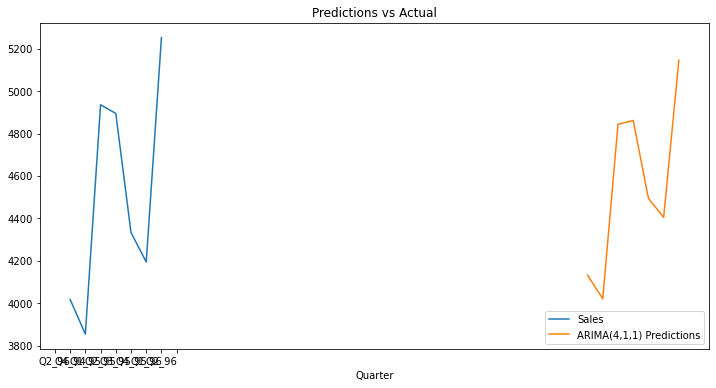

In [18]:
title = 'Predictions vs Actual'
ylabel='Sales'
xlabel='' 

test['Sales'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
plt.show()

In [19]:
from sklearn.metrics import mean_squared_error

error = mean_squared_error(test['Sales'], predictions)
error.round(2)

18899.8

In [20]:
from statsmodels.tools.eval_measures import rmse

error = rmse(test['Sales'], predictions)
error.round(2)

137.48

In [21]:
test['Sales'].mean()

4497.428571428572

In [24]:
model = ARIMA(df['Sales'],order=(4,1,1))
results = model.fit()
fcast = results.predict(len(df),len(df)+7,typ='levels').rename('ARIMA(4,1,1) Forecast')

C:\Users\Mayu\Downloads\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Mayu\Downloads\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Mayu\Downloads\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
C:\Users\Mayu\Downloads\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported i

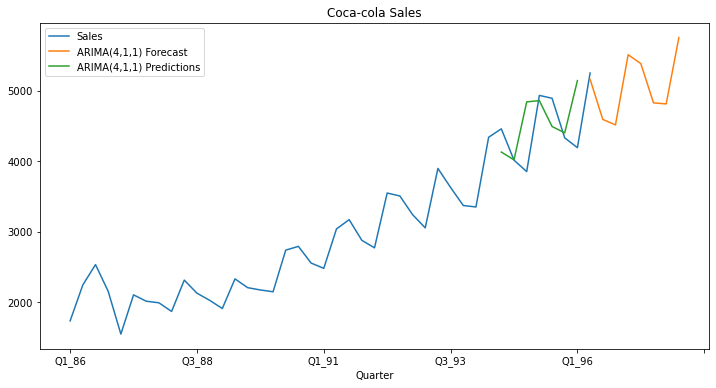

In [25]:
# Plot predictions against known values
title = 'Coca-cola Sales'
ylabel='Sales'
xlabel='Period' 

df['Sales'].plot(legend=True,figsize=(12,6),title=title)
fcast.plot(legend=True)
predictions.plot(legend=True)
plt.show()